In [3]:
%matplotlib inline

In [44]:
# %load source/estimate_impact.py
# Estimate the impact of using OddsCheck
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
import sys
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.pipeline import Pipeline
from source.utils import ProjectsData
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(55)

fname = 'data_csv/projects/projects.csv.ab'
# fname = 'data/opendata_projects000.gz'

projects = ProjectsData(fname)
projects.get_data()
# projects.sample(frac = .5)

# Unpickle the fitted pipeline and the model coefs
filename_model = 'models/pipe_logit_lasso_price.pkl'
pipe_price = pickle.load(open(filename_model, 'rb'))
filename_model = 'models/pipe_logit_lasso.pkl'
pipe = pickle.load(open(filename_model, 'rb'))

# Compute Optimal Price
from scipy import optimize
row = projects.df.iloc[[0]]
def expected_payoff(price, row, pipe):
    row.total_price_excluding_optional_support = price
    p_hat = pipe_price.predict_proba(row)[0][1]
    expected = p_hat * price
    return(-expected)

def est_prob(price, row, pipe):
    row.total_price_excluding_optional_support = price
    p_hat = pipe_price.predict_proba(row)[0][1]
    return(p_hat)


row = projects.df.iloc[[0]]
res = optimize.minimize_scalar(expected_payoff, args = (row, pipe), options = {'disp':False})
print(res.x)
price_opt = res.x

df = projects.df
df['p_hat'] = pipe.predict_proba(df)[:, 1]
df['price_oc'] = df.total_price_excluding_optional_support
df.price_oc[df.price_oc > price_opt] = price_opt

df_oc_price = df.copy()
df_oc_price['total_price_excluding_optional_support'] = df.price_oc
df['p_hat_oc'] = pipe.predict_proba(df_oc_price)[:, 1]

df['exp_payoff'] = df['total_price_excluding_optional_support'] * df['p_hat']
df['payoff'] = df['funded'] * df['total_price_excluding_optional_support']
df['exp_payoff_oc'] = df['price_oc'] * df['p_hat_oc']

total_payoff = df.payoff.sum()
total_exp_payoff = df.exp_payoff.sum()
total_exp_payoff_oc = df.exp_payoff_oc.sum()

print(total_payoff)
print(total_exp_payoff)
print(total_exp_payoff_oc)


removed the recent dates with incomplete projects
(10000, 44)
Initial size of data
(10000, 44)
Size of data after removing unnecessary columns apriori
(10000, 19)
The following columns have > 5% missing and are dropped
Index(['school_metro', 'secondary_focus_area'], dtype='object')
(10000, 17)
Removing outliers
(9980, 17)
Remove any rows with missing values
(9980, 17)
2078.84477348
3082152.0199999763
2489620.4120021746
2538315.1517914953


In [5]:
import matplotlib.pyplot as plt

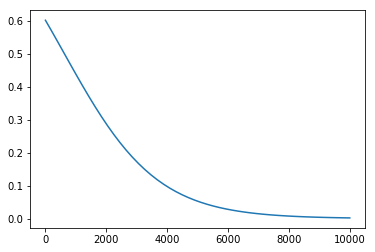

In [19]:
prices = np.linspace(1, 10001)
est_p = np.array(list(map(lambda x: est_prob(x, row, pipe), prices)))
plt.plot(prices, est_p)

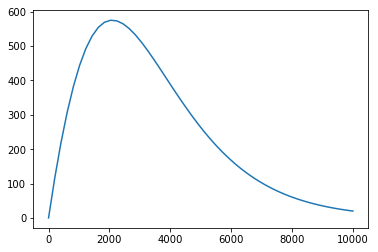

In [11]:
prices = np.linspace(1, 10001)
exp_payoffs = -np.array(list(map(lambda x: expected_payoff(x, row, pipe), prices)))
plt.plot(prices, exp_payoffs)

(array([  8.38300000e+03,   1.17900000e+03,   2.63000000e+02,
          6.70000000e+01,   4.30000000e+01,   2.20000000e+01,
          8.00000000e+00,   7.00000000e+00,   3.00000000e+00,
          5.00000000e+00]),
 array([    0.   ,   994.558,  1989.116,  2983.674,  3978.232,  4972.79 ,
         5967.348,  6961.906,  7956.464,  8951.022,  9945.58 ]),
 <a list of 10 Patch objects>)

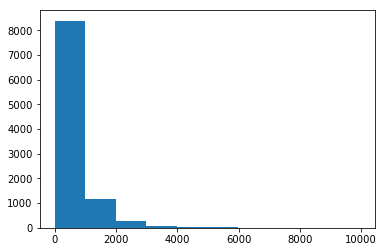

In [28]:
plt.hist(df.total_price_excluding_optional_support)



(array([   94.,    71.,   109.,   202.,   371.,   471.,   869.,  1940.,
         4022.,  1831.]),
 array([  5.60604982e-04,   6.63220138e-02,   1.32083423e-01,
          1.97844831e-01,   2.63606240e-01,   3.29367649e-01,
          3.95129058e-01,   4.60890466e-01,   5.26651875e-01,
          5.92413284e-01,   6.58174693e-01]),
 <a list of 10 Patch objects>)

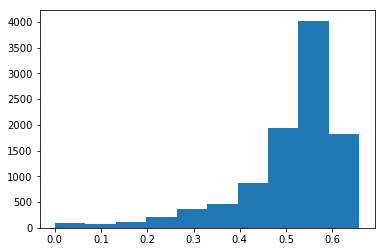

In [32]:
#df[df.total_price_excluding_optional_support > 5000]
p_hats = pipe.predict_proba(df)[:, 1]
plt.hist(p_hats)


In [45]:
df[df.total_price_excluding_optional_support > 5000]
#df[df.total_price_excluding_optional_support < 500]

,school_state,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,...,grade_level,total_price_excluding_optional_support,students_reached,funded,p_hat,price_oc,p_hat_oc,exp_payoff,payoff,exp_payoff_oc
90,NC,f,t,f,f,f,f,Ms.,f,f,...,Grades 3-5,8244.08,51.0,False,0.002762,2078.844773,0.261132,22.770410,0.00,542.852722
111,CA,t,f,f,f,f,f,Ms.,f,f,...,Grades 9-12,6469.80,150.0,False,0.011471,2078.844773,0.268374,74.218083,0.00,557.907564
277,CA,t,f,f,f,f,f,Mr.,f,f,...,Grades 9-12,7246.75,100.0,False,0.005424,2078.844773,0.241036,39.304134,0.00,501.077042
283,NC,f,f,f,f,f,f,Ms.,f,f,...,Grades 3-5,5228.52,30.0,False,0.025052,2078.844773,0.234296,130.986663,0.00,487.064641
493,NY,f,f,f,f,f,f,Ms.,f,f,...,Grades 9-12,5522.70,170.0,False,0.023007,2078.844773,0.261132,127.062116,0.00,542.852722
992,NY,f,f,f,f,f,f,Mr.,f,t,...,Grades 9-12,8411.15,60.0,False,0.002098,2078.844773,0.234296,17.648884,0.00,487.064641
1129,CA,f,f,f,f,f,f,Ms.,t,f,...,Grades 3-5,9515.08,1.0,True,0.000915,2078.844773,0.241036,8.707166,9515.08,501.077042
1788,CA,f,f,f,f,f,f,Mrs.,f,f,...,Grades 9-12,5625.20,5.0,False,0.015412,2078.844773,0.202964,86.696664,0.00,421.930371
2282,CA,f,f,f,f,f,f,Mrs.,f,f,...,Grades 3-5,6679.93,25.0,False,0.008696,2078.844773,0.246483,58.086729,0.00,512.399574
2992,NY,t,f,f,f,f,f,Ms.,f,f,...,Grades 3-5,5244.93,45.0,True,0.028465,2078.844773,0.261132,149.296473,5244.93,542.852722
